### Ejercicio 1

La función de control en este caso es $u(t) = C_e^1(t)$. Hacemos el balance de volumen entrante menos saliente para obtener $V_1(t)$.

\begin{align}
V_1(t) &= V_1 + \left(f_1 - f_2 - f_3 - f_4\right)t \\
&= V_1 + \Delta_1 t
\end{align}

Haciendo una ecuación similar para la concentración, basandonos en el caso de 1 sólo estanque, obtenemos:

\begin{align}
\dot{C}_1(t) &= \frac{u(t) - C_1(t) f_1}{V_1 + \Delta_1t}\\
&= C_1(t)\frac{-f_1}{V_1 + \Delta_1t} + u(t)\frac{f_1}{V_1 + \Delta_1t}
\end{align}

Un desarrollo similar para el volumen del segundo contenedor nos da que:

\begin{align}
V_2(t) &= V_2 + \left(f_4 - f_5 - f_6 - f_7\right)t \\
\end{align}

### Ejercicio 2

### Break

### Ejercicio 3

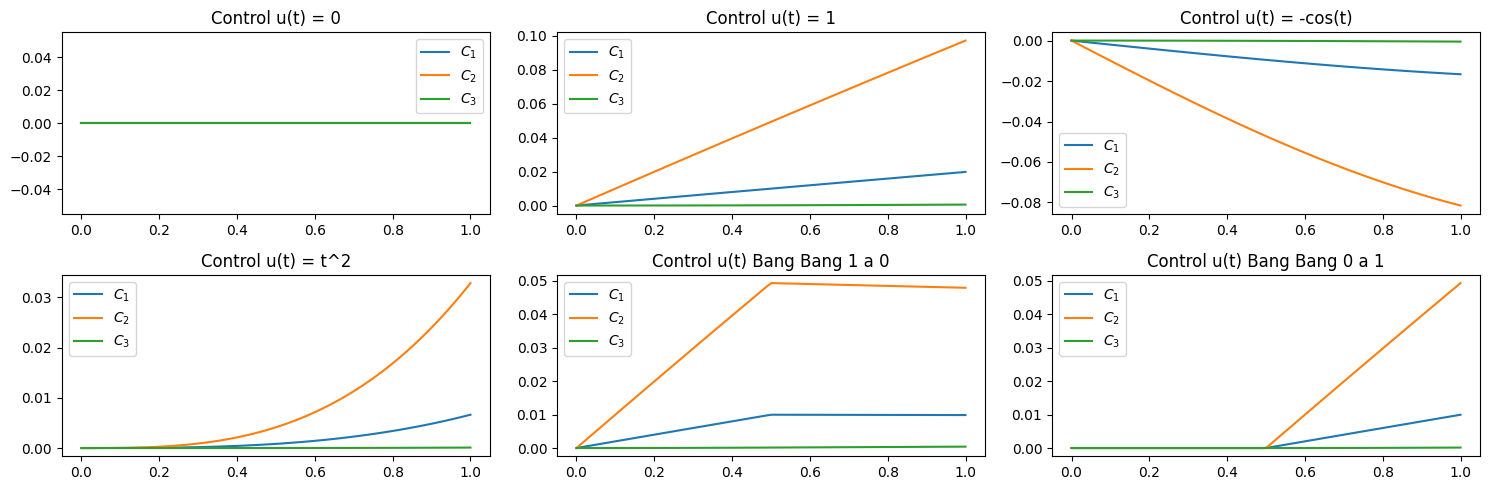

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A = np.array([[-2/100, 0, 0], [1/100, -6/100, 0], [2/300, 1/100, -5/300]])
B = np.array([2/100, 10/100, 0])

def f(t, y, control):
    return A @ y + B * control(t)


fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes = axes.flatten()
controls = [lambda t: 0, lambda t: 1, lambda t: -np.cos(t), lambda t: t**2, lambda t: 1 if t < 0.5 else 0, lambda t: 1 if t > 0.5 else 0]
control_names = ['u(t) = 0', 'u(t) = 1', 'u(t) = -cos(t)', 'u(t) = t^2', 'u(t) Bang Bang 1 a 0', 'u(t) Bang Bang 0 a 1']

for i, control in enumerate(controls):
    sol = solve_ivp(f, [0, 1], [0, 0, 0], args=(control,), max_step=0.01)
    axes[i].plot(sol.t, sol.y[0], label="$C_1$")
    axes[i].plot(sol.t, sol.y[1], label="$C_2$")
    axes[i].plot(sol.t, sol.y[2], label="$C_3$")
    axes[i].legend()
    axes[i].set_title(f"Control {control_names[i]}")

fig.tight_layout()
plt.show()

### Ejercicio 4

In [3]:
import control as ctr

B = np.array([[2/100], [10/100], [0]])
Kalman = np.concatenate((B, A@B, A@A@B), axis=1)

Kalman2 = ctr.ctrb(A, B)

# print(Kalman)
# print(Kalman2)
# print(Kalman - Kalman2)

diff = np.abs(Kalman - Kalman2)

rank = np.linalg.matrix_rank(Kalman)

print(f"Matriz de Kalman: \n {Kalman}. \n\nCon respecto a la obtenida usando ctrb, la diferencia es: \n {diff}\n")
print(f"Rango de la matriz de Kalman: {rank}")


Matriz de Kalman: 
 [[ 2.00000000e-02 -4.00000000e-04  8.00000000e-06]
 [ 1.00000000e-01 -5.80000000e-03  3.44000000e-04]
 [ 0.00000000e+00  1.13333333e-03 -7.95555556e-05]]. 

Con respecto a la obtenida usando ctrb, la diferencia es: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Rango de la matriz de Kalman: 3


In [4]:
C = np.array([[0, 1, 0],
              [0, 0, 1]])

Obs = np.concatenate((C, C@A, C@A@A), axis=0)

Obs2 = ctr.obsv(A, C)

# print(Kalman)
# print(Kalman2)
# print(Kalman - Kalman2)

diff = np.abs(Obs - Obs2)

rank = np.linalg.matrix_rank(Obs)

print(f"Matriz de Observabilidad: \n {Obs}. \n\nCon respecto a la obtenida usando obsv, la diferencia es: \n {diff}\n")
print(f"Rango de la matriz de observabilidad: {rank}")

Matriz de Observabilidad: 
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.00000000e-02 -6.00000000e-02  0.00000000e+00]
 [ 6.66666667e-03  1.00000000e-02 -1.66666667e-02]
 [-8.00000000e-04  3.60000000e-03  0.00000000e+00]
 [-1.44444444e-04 -7.66666667e-04  2.77777778e-04]]. 

Con respecto a la obtenida usando obsv, la diferencia es: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Rango de la matriz de observabilidad: 3


In [5]:
def characteristic_polynomial(M: np.ndarray) -> np.polynomial.polynomial.Polynomial:
    return np.polynomial.Polynomial.fromroots(np.linalg.eigvals(M))

coefs = np.matrix(characteristic_polynomial(A).coef[:-1])

upper_part = np.identity(3)[1:]

BrunovskiA = np.concatenate((upper_part, -coefs), axis=0)

BrunovskiB = np.zeros((3, 1))
BrunovskiB[2, 0] = 1

system = ctr.ss(A, B, C, np.zeros((2,1)))
tf = ctr.ss2tf(system)
canonical = ctr.canonical_form(tf, form='reachable')


ControlNotImplemented: Canonical forms for MIMO systems not yet supported

### Ejercicio 7

[-3.00000021 -1.9999998  -0.99999999]
[-0.11758387+0.j        -0.02163231+0.0016823j -0.02163231-0.0016823j]


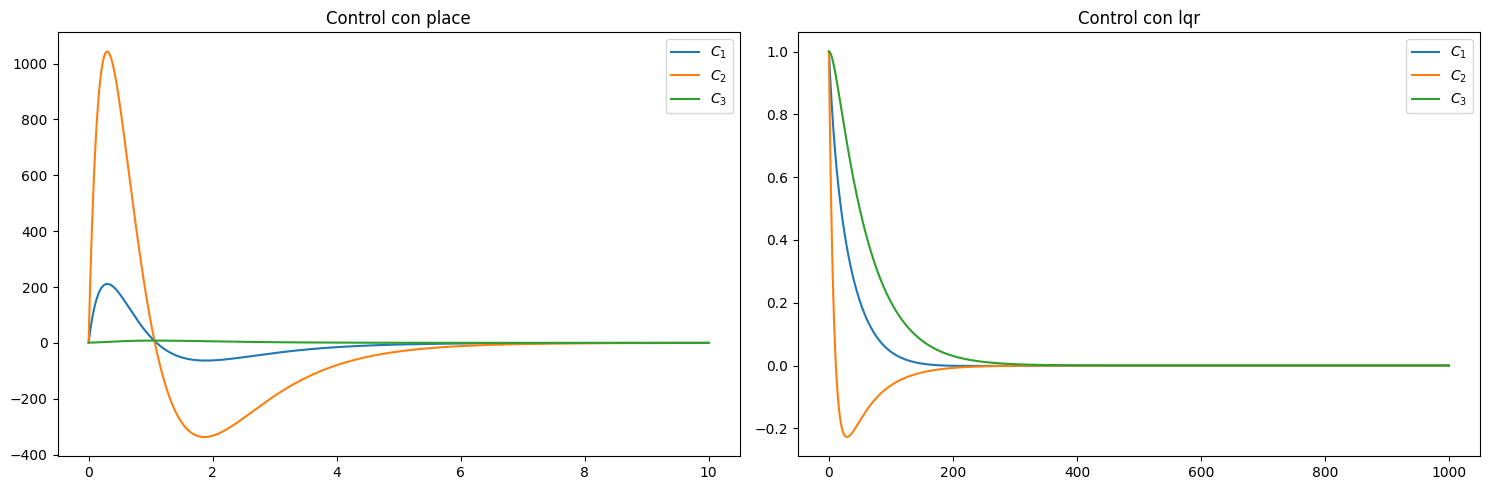

In [22]:
def feedbackcontrol(t, X, D):
    return D @ X.flatten()


firstK = np.matrix(ctr.place(A, B, [-1, -2, -3]))
hurwitzmaybe = A - B@firstK

eigs = np.linalg.eigvals(hurwitzmaybe)
print(eigs)

R = np.random.random(size=(1, 1))
Q = np.identity(3)

secondK,_,_ = ctr.lqr(A, B, Q, R)

secondhurwitzmaybe = A - B@secondK

eigs2 = np.linalg.eigvals(secondhurwitzmaybe)
print(eigs2)

# print(hurwitzmaybe)
# print(secondhurwitzmaybe)

sol1 = solve_ivp(feedbackcontrol, [0, 10], [1, 1, 1], args=(hurwitzmaybe,), max_step=0.01)
sol2 = solve_ivp(feedbackcontrol, [0, 1000], [1, 1, 1], args=(secondhurwitzmaybe,), max_step=0.01)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(sol1.t, sol1.y[0], label="$C_1$")
axes[0].plot(sol1.t, sol1.y[1], label="$C_2$")
axes[0].plot(sol1.t, sol1.y[2], label="$C_3$")
axes[0].legend()
axes[0].set_title(f"Control con place")

axes[1].plot(sol2.t, sol2.y[0], label="$C_1$")
axes[1].plot(sol2.t, sol2.y[1], label="$C_2$")
axes[1].plot(sol2.t, sol2.y[2], label="$C_3$")
axes[1].legend()
axes[1].set_title(f"Control con lqr")

fig.tight_layout()
plt.show()